a. Importing the packages

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

b. Loading and preprocessing the data

In [40]:
(x_train, y_train), (x_test, y_test)=  tf.keras.datasets.cifar10.load_data()


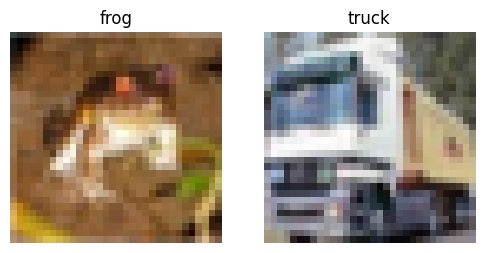

In [41]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(6,3))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()


In [42]:

#normalize
x_train, x_test = x_train/255.0, x_test/255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

c. Network architectur

In [43]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the input image
    Dense(128, activation='relu'),     # First hidden layer
    Dense(64, activation='relu'),      # Second hidden layer
    Dense(10, activation='softmax')    # Output layer for 10 classes
])

# Compile the model (using SGD/Adam optimizer)
optimizer = Adam(learning_rate=0.01)  # Or use Adam()
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


c:\Users\muggs\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 197,322 (770.79 KB)

 Trainable params: 197,322 (770.79 KB)

 Non-trainable params: 0 (0.00 B)

d. Train the model

In [44]:
train = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.1988 - loss: 2.7025 - val_accuracy: 0.2629 - val_loss: 2.0101
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3027 - loss: 1.9007 - val_accuracy: 0.2995 - val_loss: 1.9081
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3201 - loss: 1.8717 - val_accuracy: 0.2972 - val_loss: 1.8555
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3182 - loss: 1.8679 - val_accuracy: 0.3282 - val_loss: 1.8478
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.3251 - loss: 1.8515 - val_accuracy: 0.3340 - val_loss: 1.8348
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3259 - loss: 1.8461 - val_accuracy: 0.3192 - val_loss: 1.8288
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3225 - loss: 1.8532 - val_accuracy: 0.3059 - val_loss: 1.8391
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3229 - loss: 1

e. Evaluate the network

In [45]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3350 - loss: 1.8255
Test Accuracy: 33.10%


f. Plotting training loss and accuracy

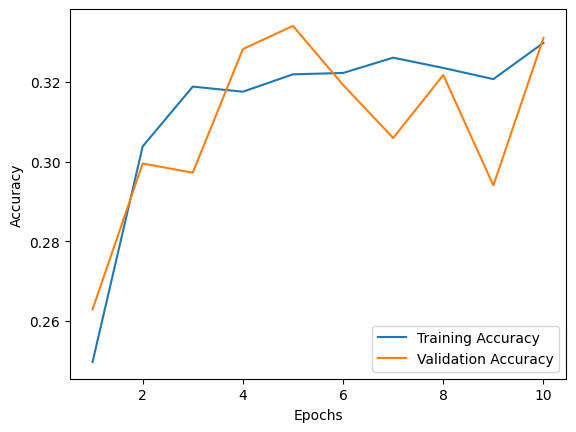

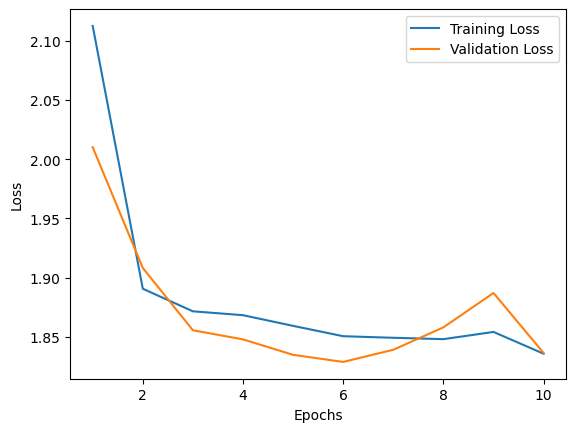

In [46]:
epochs = range(1,11)
plt.plot(epochs,train.history['accuracy'],label='Training Accuracy')
plt.plot(epochs,train.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs,train.history['loss'],label='Training Loss')
plt.plot(epochs,train.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


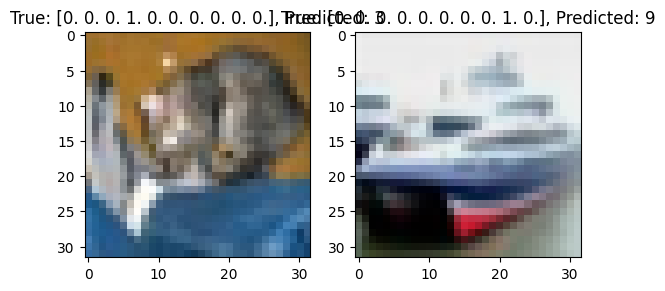

In [47]:
num=2
plt.figsize=(10,10)
prefiction = model.predict(x_test)
for i in range(num):
    plt.subplot(1,num,i+1)
    plt.imshow(x_test[i])
    true_label = y_test[i]
    predicted_label = tf.argmax(prefiction[i])
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
plt.show()
